# Wind Power Data Analysis

## Analyzing and Estimating Wind Energy Production in United States 

Wind Energy is a renewable energy that turns the kinetic energy in Earth's surface into usuable electricity. Wind Energy is green, sustainable, and afforable. As 77.6% of United States' primary energy production is generated by Natural gas, Petroleum, and Coal [(U.S. Energy Information Administration)](https://www.eia.gov/energyexplained/?page=us_energy_home) I wanted to explore how effective wind energy would be in different states in the United States. 

# <a id='TOC'>Table of Contents</a>
<ol>
<li><a href='#section 1'>Description of the Data</a></li>
<li><a href='#section_2'>Data Cleaning</a></li>
<li><a href='#section_3'>Wind Speed by County</a></li>
<li><a href='#section_4'>Wind Speed by State</a></li>
<li><a href='#section_5'>Energy Generated by State</a></li>
<li><a href='#section_6'>Conclusion</a></li>
</ol>

## <a id='section_1'>1. Description of the Data</a>
<a href='#TOC'>Back to table of Contents</a>

All of the data for this project was collected from the National Centers for Environmental Information. The original data included Climate Data from weather stations worldwide and included several million data points for each year. The data was cleaned and organized through mysql. The link to the original weather data is included [here](https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html).

## 2. <a id='section_2'>Data Cleaning and Importing </a>
<a href='#TOC'>Back to table of Contents</a>

Removing unnecessary columns and importing data files that were collected from mysql. 

In [1]:
# Import Modules 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import math 


In [2]:
# Import Data
wind_speed_07 = pd.read_csv('/Users/jpar746/Desktop/Work/Weather/data/us_wind_2007.csv')
wind_speed_08 = pd.read_csv('/Users/jpar746/Desktop/Work/Weather/data/us_wind_2008.csv')
wind_speed_09 = pd.read_csv('/Users/jpar746/Desktop/Work/Weather/data/us_wind_2009.csv')
wind_speed_10 = pd.read_csv('/Users/jpar746/Desktop/Work/Weather/data/us_wind_2010.csv')
wind_speed_11 = pd.read_csv('/Users/jpar746/Desktop/Work/Weather/data/us_wind_2011.csv')
wind_speed_12 = pd.read_csv('/Users/jpar746/Desktop/Work/Weather/data/us_wind_2012.csv')
wind_speed_13 = pd.read_csv('/Users/jpar746/Desktop/Work/Weather/data/us_wind_2013.csv')
wind_speed_14 = pd.read_csv('/Users/jpar746/Desktop/Work/Weather/data/us_wind_2014.csv')
wind_speed_15 = pd.read_csv('/Users/jpar746/Desktop/Work/Weather/data/us_wind_2015.csv', delimiter=';')
wind_speed_16 = pd.read_csv('/Users/jpar746/Desktop/Work/Weather/data/us_wind_2016.csv', delimiter=';')
wind_speed_17 = pd.read_csv('/Users/jpar746/Desktop/Work/Weather/data/us_wind_2017.csv', delimiter=';')
wind_speed_18 = pd.read_csv('/Users/jpar746/Desktop/Work/Weather/data/us_wind_2018.csv', delimiter=';')


In [3]:
# Testing import, AWND stands for Average Daily Wind Speed (tenths of meters per second)
print(wind_speed_14.head())


       station      date information  value state              city  postal
0  USW00094626  20140101        AWND     23    ME  GREENVILLE MAINE   72619
1  USW00024229  20140101        AWND     10    OR  PORTLAND INTL AP   72698
2  USW00014719  20140101        AWND     29    NY  WESTHAMPTN GABRE       0
3  USW00012876  20140101        AWND     36    FL  WINTER HAVEN GIL       0
4  USW00012842  20140101        AWND     33    FL     TAMPA INTL AP   72211


In [4]:
# Making sure that all the states are covered by this data
print(wind_speed_14['state'].value_counts().head())
print(len(wind_speed_14['state'].value_counts()))

# We can confirm that all 50 states are covered by the data.

CA    29688
TX    25154
FL    17559
AK    15907
WA    12361
Name: state, dtype: int64
50


In [5]:
# Dropping unnecessary columns for all data
data = [wind_speed_07, wind_speed_08, wind_speed_09, wind_speed_10, wind_speed_11, wind_speed_12, wind_speed_13, wind_speed_14, wind_speed_15, wind_speed_16, wind_speed_17]
for table in data:
    table.drop(columns=['station','information'], inplace=True) 
print(wind_speed_15.head())

         date  value state              city  postal
0  2015-01-01     26    ME  GREENVILLE MAINE   72619
1  2015-01-01     26    OR  PORTLAND INTL AP   72698
2  2015-01-01     66    NY  WESTHAMPTN GABRE       0
3  2015-01-01      8    WY          RIVERTON       0
4  2015-01-01     31    FL  WINTER HAVEN GIL       0


In [6]:
# City is an inaccurate description of the data, it should be county 
# Value should be clarified for users as value should be wind speed 
for table in data:
    table.rename(columns={'city':'county', 'value':'wind_speed'}, inplace=True)
print(wind_speed_15.head())

         date  wind_speed state            county  postal
0  2015-01-01          26    ME  GREENVILLE MAINE   72619
1  2015-01-01          26    OR  PORTLAND INTL AP   72698
2  2015-01-01          66    NY  WESTHAMPTN GABRE       0
3  2015-01-01           8    WY          RIVERTON       0
4  2015-01-01          31    FL  WINTER HAVEN GIL       0


In [7]:
# Check the types of all the data points 
for table in data:
    print(table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338430 entries, 0 to 338429
Data columns (total 5 columns):
date          338430 non-null int64
wind_speed    338430 non-null int64
state         338430 non-null object
county        338430 non-null object
postal        338430 non-null int64
dtypes: int64(3), object(2)
memory usage: 12.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339915 entries, 0 to 339914
Data columns (total 5 columns):
date          339915 non-null int64
wind_speed    339915 non-null int64
state         339915 non-null object
county        339915 non-null object
postal        339915 non-null int64
dtypes: int64(3), object(2)
memory usage: 13.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342259 entries, 0 to 342258
Data columns (total 5 columns):
date          342259 non-null int64
wind_speed    342259 non-null int64
state         342259 non-null object
county        342259 non-null object
postal        342259 non-null int64
dtypes: int6

In [8]:
# Date needs to be cahnged into a datetime
# From year 2015 to 2018 the format of the date is '%Y-%m-%d', before 2015 all the dates are in the format of '%Y%m%d'
temp1 = [wind_speed_15, wind_speed_16, wind_speed_17, wind_speed_18]

for table in temp1:
    table['date'] = pd.to_datetime(table['date'], format = '%Y-%m-%d')

for table in data:
    table['date'] = pd.to_datetime(table['date'], format = '%Y%m%d')

for table in data:
    print(table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338430 entries, 0 to 338429
Data columns (total 5 columns):
date          338430 non-null datetime64[ns]
wind_speed    338430 non-null int64
state         338430 non-null object
county        338430 non-null object
postal        338430 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 12.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339915 entries, 0 to 339914
Data columns (total 5 columns):
date          339915 non-null datetime64[ns]
wind_speed    339915 non-null int64
state         339915 non-null object
county        339915 non-null object
postal        339915 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 13.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342259 entries, 0 to 342258
Data columns (total 5 columns):
date          342259 non-null datetime64[ns]
wind_speed    342259 non-null int64
state         342259 non-null object
county        342259

In [9]:
# Setting date as the index for all the tables
for table in data:
    table.set_index('date', inplace=True)

# Dividing Wind Speed to be in m/s
for table in data:
    table['wind_speed'] = table['wind_speed'] / 10

print(wind_speed_15.head())

            wind_speed state            county  postal
date                                                  
2015-01-01         2.6    ME  GREENVILLE MAINE   72619
2015-01-01         2.6    OR  PORTLAND INTL AP   72698
2015-01-01         6.6    NY  WESTHAMPTN GABRE       0
2015-01-01         0.8    WY          RIVERTON       0
2015-01-01         3.1    FL  WINTER HAVEN GIL       0


In [10]:
# Temperature, humidity, radius of the wind turbine, and etc affect the energy generated and the function of the wind turbine. The jupyter notebook, Weather Data Analysis coveres those factors. 

## <a id='section_3'>3. Wind Speed by County</a>
<a href='#TOC'>Back to table of Contents</a>

Wind turbines generate electricity through natural wind. As the air passes by the blade of the wind turbine, this creates rotational energy. We can then turn this rotational energy into electrical energy. This electricity is then converted into the right voltage for the grid network. From the grid network this electricity is sent to our homes. 

Wind Speed is the major component of this process. In addition, for our calculation of energy generated, we will assume that wind speed is the only variable. Therefore, we will dive deeper to explore the wind speeds in US counties and states.
[Energy.gov](https://www.energy.gov/eere/articles/how-do-wind-turbines-survive-severe-storms)

In [11]:
# To make the data more relatable we will convert meters per second into miles per hour by multiplying 2.237 
# We will also remove wind_speed_18 from the data as we are going to be using in the linear regression model later
miles_data = ['miles_07', 'miles_08','miles_09', 'miles_10', 'miles_11','miles_12', 'miles_13', 'miles_14','miles_15', 'miles_16', 'miles_17']
for i in range(len(data)):
    miles_data[i] = data[i].copy()

In [12]:
for table in miles_data:
    table['wind_speed'] = table['wind_speed'].apply(lambda x: x*2.237)

In [13]:
for table in miles_data:
    print(table.head())

            wind_speed state            county  postal
date                                                  
2007-01-01      3.8029    ME  GREENVILLE MAINE   72619
2007-01-01     10.9613    OR  PORTLAND INTL AP   72698
2007-01-01     12.3035    NY  WESTHAMPTN GABRE       0
2007-01-01      2.4607    WY          RIVERTON       0
2007-01-01      8.5006    FL  WINTER HAVEN GIL       0
            wind_speed state            county  postal
date                                                  
2008-01-01      5.1451    ME  GREENVILLE MAINE   72619
2008-01-01     19.9093    OR  PORTLAND INTL AP   72698
2008-01-01      8.5006    NY  WESTHAMPTN GABRE       0
2008-01-01      8.0532    WY          RIVERTON       0
2008-01-01      8.5006    FL  WINTER HAVEN GIL       0
            wind_speed state            county  postal
date                                                  
2009-01-01     21.0278    ME  GREENVILLE MAINE   72619
2009-01-01      8.2769    OR  PORTLAND INTL AP   72698
2009-01-01

I personally found it hard to quantify wind speeds but looking at the [Beaufort scale](https://en.wikipedia.org/wiki/Beaufort_scale) helps visualize these wind speeds. 

In [14]:
# Let's look at some counties with the fastest wind speeds from 2007 to 2017 (mph)
for table in miles_data:
    table = table.sort_values(by=['wind_speed'], ascending = False)
    print(table.head(3))

            wind_speed state        county  postal
date                                              
2007-11-24    113.1922    CO  Hoosier Pass       0
2007-12-27    113.1922    CO  Hoosier Pass       0
2007-12-14    112.9685    CO  Hoosier Pass       0
            wind_speed state            county  postal
date                                                  
2008-01-14    114.0870    CO      Hoosier Pass       0
2008-11-05    112.0737    CO  Middle Fork Camp       0
2008-11-30    109.6130    CO      Hoosier Pass       0
            wind_speed state      county  postal
date                                            
2009-11-29    119.9032    AZ  Happy Jack       0
2009-10-27    119.9032    AZ  Happy Jack       0
2009-12-30    119.9032    AZ  Happy Jack       0
            wind_speed state        county  postal
date                                              
2010-06-30   1110.2231    OR  Taylor Green       0
2010-05-25   1020.5194    OR  Taylor Green       0
2010-07-06    903.971

By ranking the dataframe by wind speeds, we can observe the highest average wind speeds in a day. The same locations within the same week tended to have the highest wind speeds. However, this is not particularly useful for our case as we want to identify states that have consistent high wind speeds. 

In [15]:
# Grouping the dataframe by month and county to observe the average monthly wind speed 
yearly_data = []
for table in miles_data:
    yearly_data.append(table.groupby([pd.Grouper(freq='Y'), 'county'])['wind_speed'].mean())

for table in yearly_data:
    print(table.head(5))

date        county          
2007-12-31  ABERDEEN            10.318392
            ABILENE RGNL AP     10.113692
            ADRIAN LENAWEE C     7.441588
            AKRON CANTON RGN     8.971289
            AKRON FULTON INT     7.142154
Name: wind_speed, dtype: float64
date        county          
2008-12-31  ABERDEEN            10.307408
            ABILENE RGNL AP     11.435593
            ADRIAN LENAWEE C     7.702819
            AKRON CANTON RGN     9.468744
            AKRON FULTON INT     7.546476
Name: wind_speed, dtype: float64
date        county          
2009-12-31  ABERDEEN             9.815145
            ABILENE RGNL AP     10.686731
            ADRIAN LENAWEE C     7.374705
            AKRON CANTON RGN     8.726139
            AKRON FULTON INT     6.971777
Name: wind_speed, dtype: float64
date        county          
2010-12-31  ABERDEEN             9.655260
            ABILENE RGNL AP     10.513287
            ADRIAN LENAWEE C     7.255847
            AKRON CANTON RGN 

In [16]:
# Now we can select the fastest average yearly wind speeds 
for i in range(len(yearly_data)):
    yearly_data[i] = yearly_data[i].sort_values(ascending=False)

for table in yearly_data:
    print(table.head())

date        county          
2007-12-31  Middle Fork Camp    72.496840
            Happy Jack          72.424867
            Spruce Springs      69.704135
            Hoosier Pass        53.354830
            Big Sandy Openin    43.007398
Name: wind_speed, dtype: float64
date        county          
2008-12-31  Spruce Springs      74.774388
            Middle Fork Camp    73.185255
            Happy Jack          72.751570
            Hoosier Pass        61.146097
            Sage Creek Basin    59.005459
Name: wind_speed, dtype: float64
date        county          
2009-12-31  Happy Jack          88.170423
            Smiley Mountain     72.104901
            Graham Guard Sta    67.677854
            Hoosier Pass        66.461629
            Jackson Peak        65.701389
Name: wind_speed, dtype: float64
date        county         
2010-12-31  Taylor Green       244.152571
            Happy Jack         119.550087
            Shuree              87.254185
            Smiley Mountain   

Based on the data from 2015, we can identify that these 5 counties had the fastest average wind speeds. However, we need to make sure that these locations are not located in national parks, mountainous, and major cities. 

In [17]:
# Let's observe the 5 most windy counties for each year in more detail
yearly_county = []
k = 0
for table in yearly_data:
    yearly_county.append([])
    year_series = table.drop(columns='date')
    for i in year_series.keys()[0:5]:
        yearly_county[k].append(i[1])
    k += 1

for i in yearly_county:
    print(i)

# Combining all the lists by year into one combined list     
fast_counties = []
for l in yearly_county:
    for i in l:
        if i not in fast_counties:
            fast_counties.append(i)

print(fast_counties)

['Middle Fork Camp', 'Happy Jack', 'Spruce Springs', 'Hoosier Pass', 'Big Sandy Openin']
['Spruce Springs', 'Middle Fork Camp', 'Happy Jack', 'Hoosier Pass', 'Sage Creek Basin']
['Happy Jack', 'Smiley Mountain', 'Graham Guard Sta', 'Hoosier Pass', 'Jackson Peak']
['Taylor Green', 'Happy Jack', 'Shuree', 'Smiley Mountain', 'Taos Powderhorn']
['Happy Jack', 'Senorita Divide ', 'Shuree', 'San Antonio Sink', 'Smiley Mountain']
['Happy Jack', 'Senorita Divide ', 'San Antonio Sink', 'Shuree', 'Bateman']
['Sierra Blanca', 'San Antonio Sink', 'Hopewell', 'Bateman', 'Happy Jack']
['Sierra Blanca', 'Middle Fork Camp', 'San Antonio Sink', 'Bateman', 'Hopewell']
['San Antonio Sink', 'Bateman', 'Happy Jack', 'Middle Fork Camp', 'MT WASHINGTON']
['San Antonio Sink', 'South Colony', 'Bateman', 'Tower', 'Happy Jack']
['Senorita Divide ', 'Quemazon', 'Upper Rio Grande', 'Hayden Pass', 'Hopewell']
['Middle Fork Camp', 'Happy Jack', 'Spruce Springs', 'Hoosier Pass', 'Big Sandy Openin', 'Sage Creek Basin'

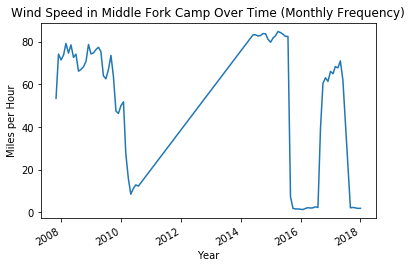

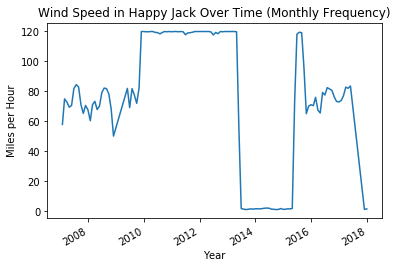

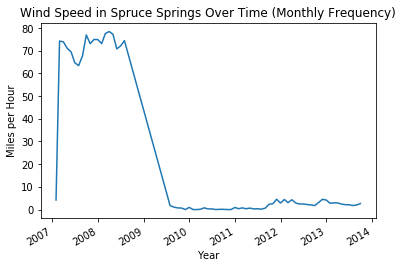

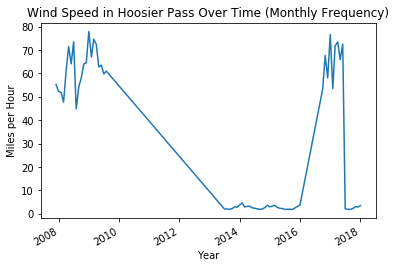

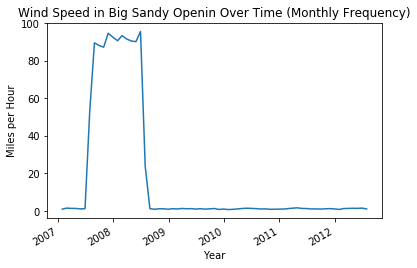

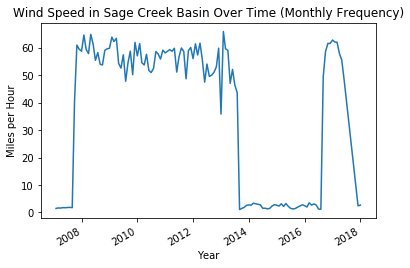

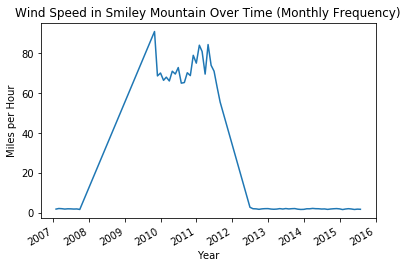

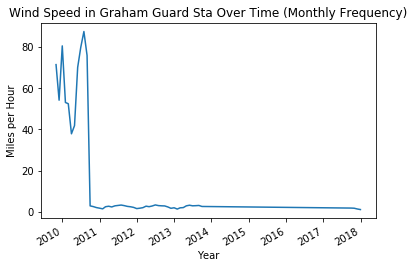

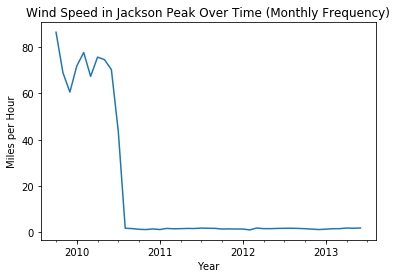

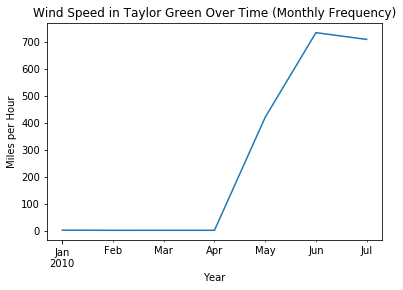

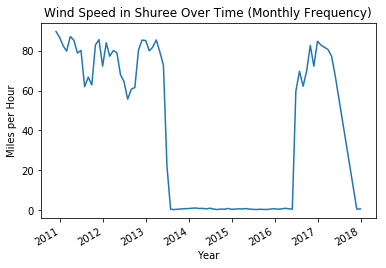

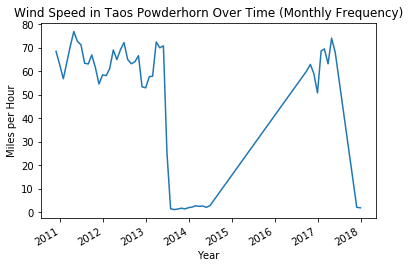

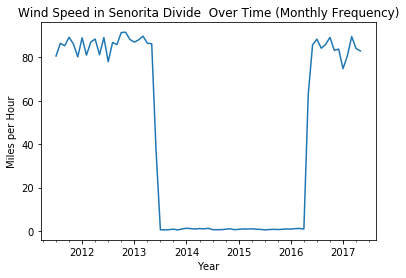

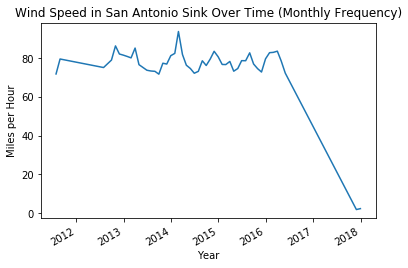

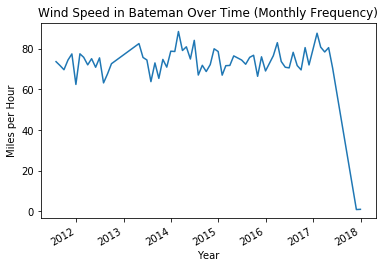

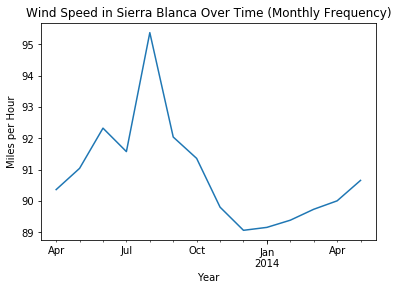

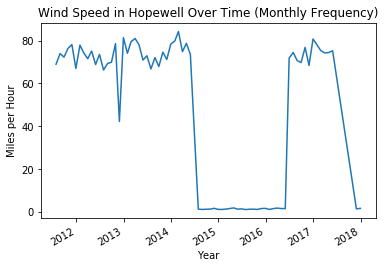

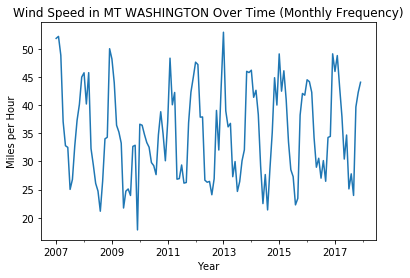

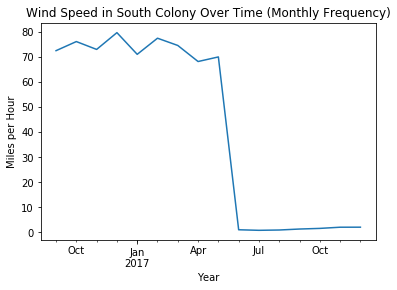

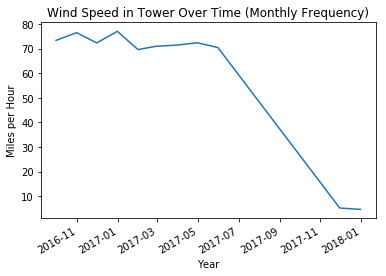

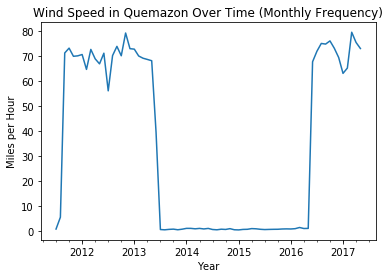

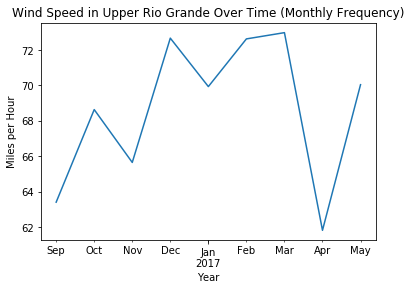

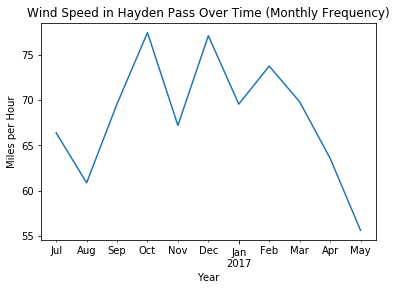

In [18]:
# Plotting the 5 most windy counties from 2015 to 2017 to observe how their wind speed varies with each month 

# Combine tables into a complete table 
miles_combined = pd.concat(miles_data)
miles_combined = miles_combined.groupby([pd.Grouper(freq='M'),'county'])['wind_speed'].mean()

# Plotting counties with high wind speeds throughout 3 years 
for county in fast_counties:
    try: 
        miles_combined[:,county].plot()
    except:
        continue
    plt.title('Wind Speed in ' + county + ' Over Time (Monthly Frequency)')
    plt.xlabel('Year')
    plt.ylabel('Miles per Hour')
    plt.show()


From the graph, we can observe some counties did not have any data before 2010. In addition a county represents too small of an area to place wind turbines and solely looking at the county was not representative of the wind speed in that area. Thus, I decided to widen the scope of the analysis and focus on ideal states for wind turbines.

## <a id='section_4'>4. Wind Speed by State</a>
<a href='#TOC'>Back to table of Contents</a>

As a county covers too small of an area and the data is inconsistent for each county, let's explore the wind speed by state. 

In [19]:
# Grouping the data by state and finding the wind speed for each year 
yearly_state = []
for table in miles_data:
    yearly_state.append(table.groupby([pd.Grouper(freq='Y'), 'state'])['wind_speed'].mean())

In [20]:
# Displaying the wind speed calculated for each state after sorting by the fastest wind speeds 
for i in range(len(yearly_state)):
    yearly_state[i] = yearly_state[i].sort_values(ascending=False)

In [21]:
# Adding states with the fastest wind speeds to a new table 
fast_wind_state = []
for year in yearly_state:
    fast_wind_state.append(year.head(10))

for year in fast_wind_state:
    print(year)

date        state
2007-12-31  WY       11.176661
            SD       10.523336
            ND       10.269486
            AZ       10.238938
            CO       10.217298
            IA        9.970276
            NE        9.950667
            KS        9.539209
            HI        9.378789
            OK        9.073880
Name: wind_speed, dtype: float64
date        state
2008-12-31  CO       14.567986
            WY       13.743252
            SD       10.551332
            ND       10.363612
            OK       10.262995
            KS       10.156051
            NE       10.146321
            AZ        9.804712
            IA        9.651467
            NM        9.549103
Name: wind_speed, dtype: float64
date        state
2009-12-31  CO       13.035313
            WY       10.603993
            SD        9.993476
            ND        9.883559
            KS        9.708401
            AZ        9.676393
            OK        9.574319
            NE        9.516062
            

Here, we can identify the 10 fastest wind speeds in each state by year. We can identify that in recent years New Mexico encountered a lot of wind. 

In [22]:
# Combining all tables by state to calculate the mean wind speed from 2007 to 2017.
state_combined = pd.concat(miles_data)
state_combined_wind = state_combined.groupby('state')['wind_speed'].mean()
state_combined_wind = state_combined_wind.sort_values(ascending=False)

print(state_combined_wind.head(10))

fast_state = []
for s in state_combined_wind.head(10).index:
    fast_state.append(s)
print(fast_state)

state
NM    18.351077
CO    11.382385
WY    10.492057
SD    10.383714
ND    10.221748
AZ    10.101460
NE     9.920833
KS     9.745404
OK     9.684343
IA     9.637547
Name: wind_speed, dtype: float64
['NM', 'CO', 'WY', 'SD', 'ND', 'AZ', 'NE', 'KS', 'OK', 'IA']


Here, we can observe the 5 states that have the highest average wind speeds across 10 years. While, this is very useful, we still need to plot the wind speeds of each state by month to observe that these states have consistent and high wind speeds.

In [23]:
state_month = state_combined.groupby([pd.Grouper(freq='M'), 'state'])['wind_speed'].mean()
print(state_month.head())

date        state
2007-01-31  AK       8.655722
            AL       6.363497
            AR       6.615129
            AZ       9.259007
            CA       5.696231
Name: wind_speed, dtype: float64


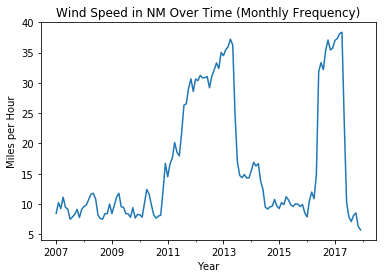

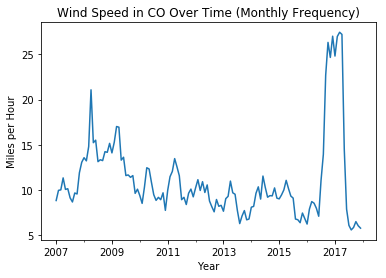

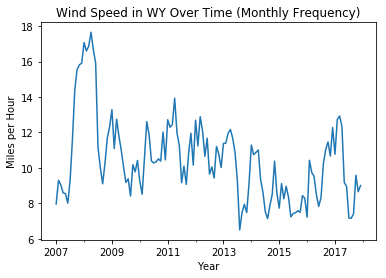

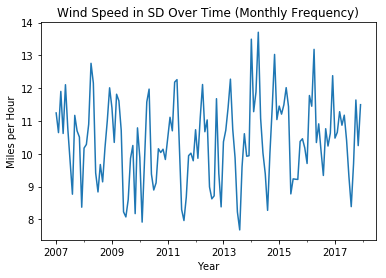

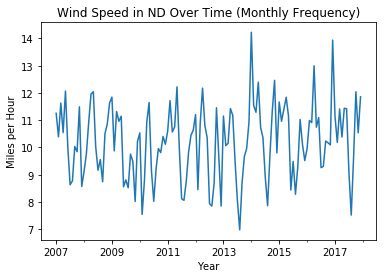

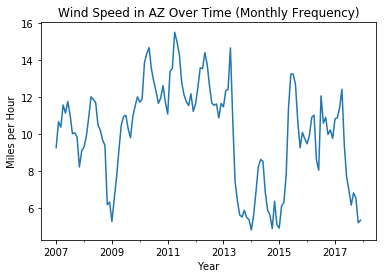

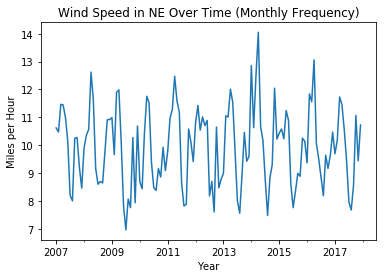

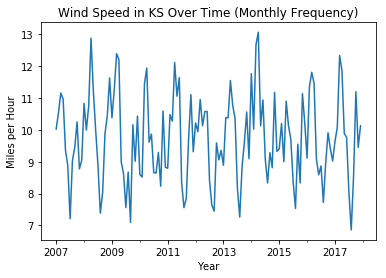

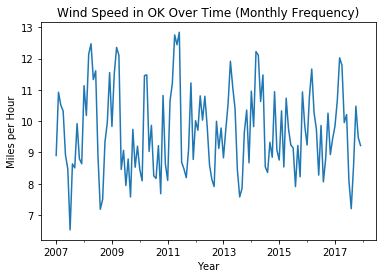

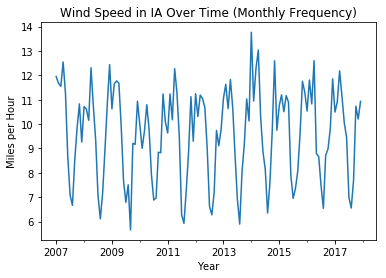

In [24]:
for state in fast_state:
    try: 
        state_month[:,state].plot()
    except:
        continue
    plt.title('Wind Speed in ' + state + ' Over Time (Monthly Frequency)')
    plt.xlabel('Year')
    plt.ylabel('Miles per Hour')
    plt.show()

For all states, we can observe that there is a fall and increase in wind speeds through each year, however, we can observe that the wind speed in New Mexico does not vary through out the year and had a period of two years where they had strong winds. Thus, New Mexico is like a great location for wind turbines. Other states such as Arizona, South Dakota, North Dakota, and others, experience slower but consistent wind speeds. This also makes them a great location to place wind turbines.  

## <a id='section_5'>5. Amount of Energy Generated through Wind Power</a>
<a href='#TOC'>Back to table of Contents</a>

In order to calculate the energy generated through a wind turbine, we need to first make some assumptions.   

The factors that matter in the calulation of wind power is the radius of the wind turbine, wind speed, air density, and the efficiency factor. According to multiple sources such as this article from Sciencing. (https://sciencing.com/much-power-wind-turbine-generate-6917667.html) The efficiency for wind turbines range from 30% to 50%. As it is only possible for a wind turbine to function at 50% in optimal conditions, I assumed for our calculations that the wind turbines had an efficiency rating of about 40%. 

In addition, I assumed that we that all the wind turbines were GE's wind turbine which has a blade length of 116 feet. While air density will vary for different cities for the sake of simplicity, I will assume that the air density is approximately 1.2225 kg/m^3.

With this information, we can now calculate the amount of energy one wind turbines will generate in each of these cities. This will be in watts and this indicates the amount of energy one wind turbines will generate. The formula to get the amount of energy produced with one wind turbine is P = π/2 * r² * v³ * ρ * η. With r being the radius, the v being the wind speed, ρ being the air density, and η being the efficiency. The units for energy is also measured in kilowatts. 

In [25]:
# Combining all the wind speed measurements in m/s
energy_combined = pd.concat(data)
energy_day = energy_combined.groupby([pd.Grouper(freq='D'), 'state'])['wind_speed'].mean()
print(energy_day.head())

date        state
2007-01-01  AK       4.226190
            AL       3.217647
            AR       3.285714
            AZ       3.833333
            CA       2.490541
Name: wind_speed, dtype: float64


In [26]:
# Converting all wind speed measurements into energy generated 
energy_day = energy_day.apply(lambda x: -np.power(x, 3) if x < 0 else np.power(x, 3))
energy_day = energy_day.apply(lambda x: x * (np.pi/2) * math.pow(35.3568,2) * 1.225 * 0.4 / 1000)

print(energy_day.head())

date        state
2007-01-01  AK       72.628832
            AL       32.053619
            AR       34.131176
            AZ       54.199043
            CA       14.864240
Name: wind_speed, dtype: float64


With the mean wind speed in a day, we can observe the amount of Kilowatts we would have generated with a wind turbine in each state. 

In [27]:
# Calculating how much energy, a wind turbine would generate in a day for each state.
energy_kwh = energy_day.apply(lambda x: x * 24)
print(energy_kwh.head())

date        state
2007-01-01  AK       1743.091975
            AL        769.286865
            AR        819.148218
            AZ       1300.777031
            CA        356.741759
Name: wind_speed, dtype: float64


Just looking at the kilowatts a wind turbine generates is hard to visualize. If we placed a wind turbine in Alaska, we would be able to generate more than an entire month's worth of energy for an average American household in just one day. https://www.eia.gov/tools/faqs/faq.php?id=97&t=3

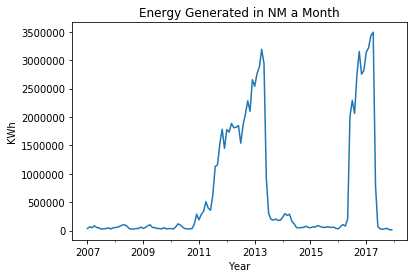

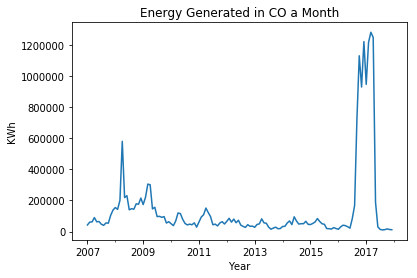

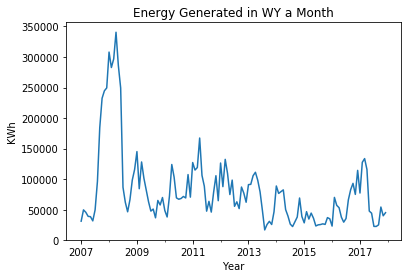

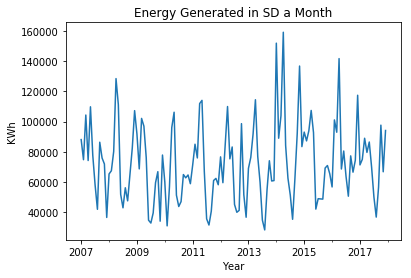

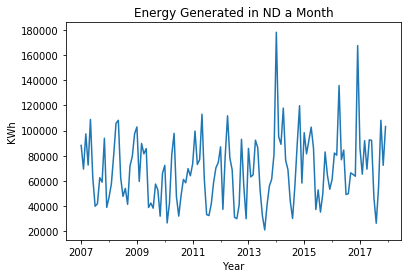

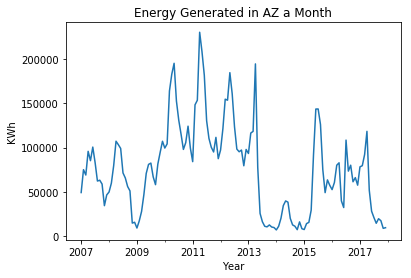

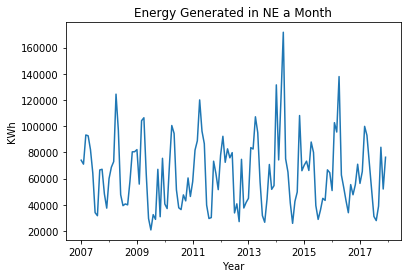

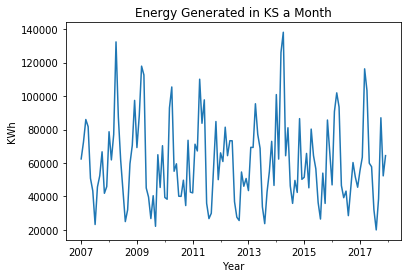

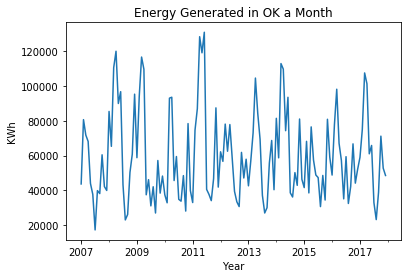

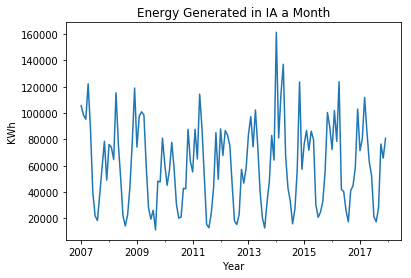

In [28]:
# Because wind is the only factor that we assumed to be a variable, let's look at how much energy states with fast and consistent wind speeds would generate.
energy_month = energy_combined.groupby([pd.Grouper(freq='M'), 'state'])['wind_speed'].mean()
energy_month = energy_month.apply(lambda x: -np.power(x, 3) if x < 0 else np.power(x, 3))
energy_month = energy_month.apply(lambda x: x * (np.pi/2) * math.pow(35.3568,2) * 1.225 * 0.4 / 1000)
# Converting hourly energy generated into month generated energy while assuming that there is a total of 30 days in each month
energy_month = energy_month.apply(lambda x: x * 24 * 30)

for state in fast_state:
    try: 
        energy_month[:,state].plot()
    except:
        continue
    plt.title('Energy Generated in ' + state + ' a Month')
    plt.xlabel('Year')
    plt.ylabel('KWh')
    plt.show()

In [29]:
for state in fast_state:
    print(state)

NM
CO
WY
SD
ND
AZ
NE
KS
OK
IA


The best states for wind turbines are New Mexico, Colorado, Wyoming, South Dakota, North Dakota, Arizona, Nebraska, Kansas, Oklahoma, and Iowa.

## <a id='section_6'>6. Conclusion</a>
<a href='#TOC'>Back to table of Contents</a>

While onshore turbines will never be as effective as offshore turbines. If they are placed in the correct locations, we can generate a large amount of clean, renewable energy. In New Mexico, during it's peak, we generated about 3 million Kilowatt Hours in a month. This is more than enough to power 288 homes for an entire year! 

While New Mexico is definately an outlier with their fast wind speeds between 2016 to 2017, in other states, they would still be generating enough energy each month to power 15 homes for an entire year. 

There are some noticeable disadvantages with using wind power, it would be almost impossible for an individual to purchase their own large scale wind turbine as the price and installation of a wind turbine ranges from 3 million to 4 million. 

However, each month a single turbine would generate about 12,000 dollars worth of energy. While the initial cost may be costly, under the right conditions, this would add up to $144,000 per year. In addition, due to economic of scale, energy companies that purchase multiple wind turbines could lower costs in the purchase and installation of wind turbines. Companies could see a return on investment in about 10 years. As the life expectancy of a wind turbine is more than 30 years, companies will be able to see a large return on their investment in the long run.

In [30]:
state_coordinate = pd.read_csv('/Users/jpar746/Desktop/Work/Weather/data/state_example.csv')
print(state_coordinate.head())

  code       state category  total exports   beef  pork  poultry   dairy  \
0   AL     Alabama    state        1390.63   34.4  10.6    481.0    4.06   
1   AK      Alaska    state          13.31    0.2   0.1      0.0    0.19   
2   AZ     Arizona    state        1463.17   71.3  17.9      0.0  105.48   
3   AR    Arkansas    state        3586.02   53.2  29.4    562.9    3.53   
4   CA  California    state       16472.88  228.7  11.1    225.4  929.95   

   fruits fresh  fruits proc  total fruits  veggies fresh  veggies proc  \
0           8.0         17.1         25.11            5.5           8.9   
1           0.0          0.0          0.00            0.6           1.0   
2          19.3         41.0         60.27          147.5         239.4   
3           2.2          4.7          6.88            4.4           7.1   
4        2791.8       5944.6       8736.40          803.2        1303.5   

   total veggies  corn  wheat   cotton  
0          14.33  34.9   70.0   317.61  
1         

In [31]:
wind_visual = energy_combined.groupby('state')['wind_speed'].mean()
wind_visual = wind_visual.apply(lambda x: -np.power(x, 3) if x < 0 else np.power(x, 3))
wind_visual = wind_visual.apply(lambda x: x * (np.pi/2) * math.pow(35.3568,2) * 1.225 * 0.4 / 1000)
# Converting hourly energy generated into month generated energy while assuming that there is a total of 30 days in each month
wind_visual = wind_visual.apply(lambda x: x * 24 * 30)
wind_visual_df = wind_visual.to_frame()
print(wind_visual_df.head())


         wind_speed
state              
AK     30312.736087
AL      8660.834974
AR     13195.170962
AZ     63789.453842
CA     14087.940539


In [32]:
# Visual Representation
import plotly.graph_objects as go

# Load data frame and tidy it.
import pandas as pd
df = wind_visual_df

fig = go.Figure(data=go.Choropleth(
    locations=df.index, # Spatial coordinates
    z = df['wind_speed'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Greens',
    colorbar_title = "Kilowatt Hours",
))

fig.update_layout(
    title_text = 'Energy Generated Monthly Through Wind Power From 2007 to 2017',
    geo_scope='usa', # limite map scope to USA
)

fig.show()